In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as splt
import seaborn
%matplotlib inline

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'}, inplace=True)

In [5]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().values.any()

False

In [8]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


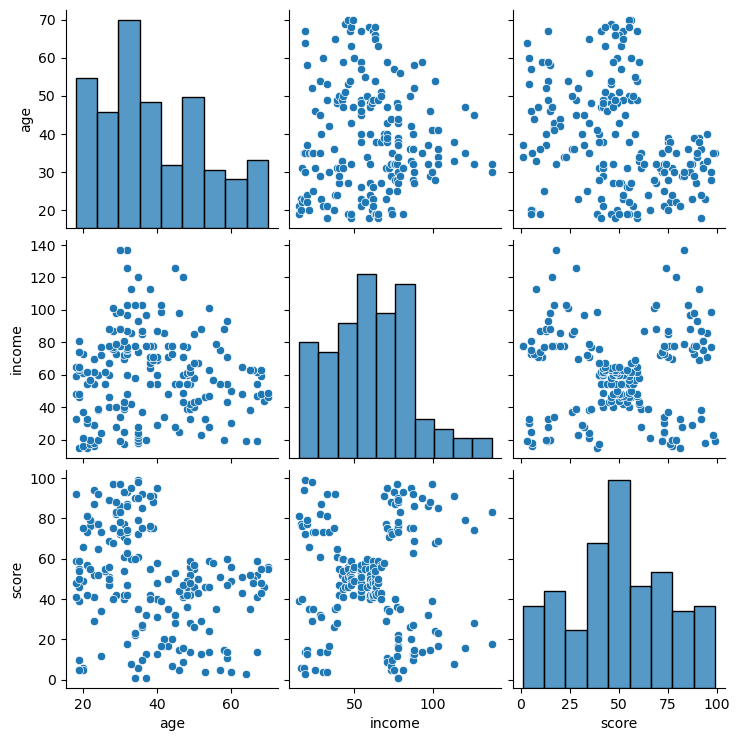

In [9]:
seaborn.pairplot(df[['age','income','score']])

In [10]:
import sklearn.cluster as cluster

In [11]:
kmeans = cluster.KMeans(n_clusters = 5)

In [15]:
kmeans = kmeans.fit(df[['income','score']])

In [16]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])

In [17]:
df['income_clusters'] = kmeans.labels_

In [18]:
df

,CustomerID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


In [19]:
df['income_clusters'].value_counts()

3    81
0    39
2    35
4    23
1    22
Name: income_clusters, dtype: int64

<AxesSubplot:xlabel='income', ylabel='score'>

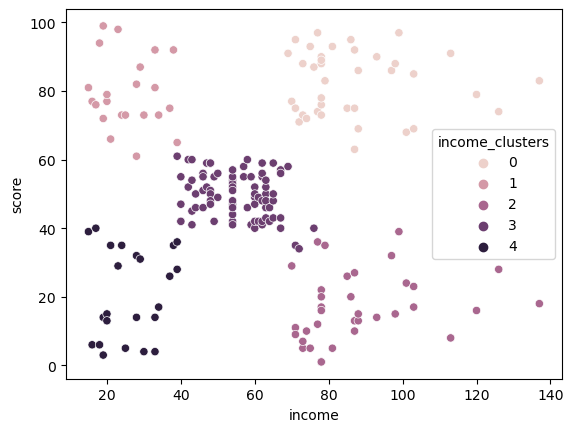

In [21]:
seaborn.scatterplot(x = 'income', y='score', hue='income_clusters', data=df)

In [22]:
kmeans = cluster.KMeans(n_clusters = 2)

In [23]:
kmeans = kmeans.fit(df[['age','score']])

In [24]:
kmeans.cluster_centers_

array([[46.16521739, 32.88695652],
       [28.95294118, 73.62352941]])

In [25]:
df['age_clusters'] = kmeans.labels_

In [26]:
df['age_clusters'].value_counts()

0    115
1     85
Name: age_clusters, dtype: int64

In [27]:
df

,CustomerID,gender,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,4,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,1
196,197,Female,45,126,28,2,0
197,198,Male,32,126,74,0,1
198,199,Male,32,137,18,2,0


<AxesSubplot:xlabel='age', ylabel='score'>

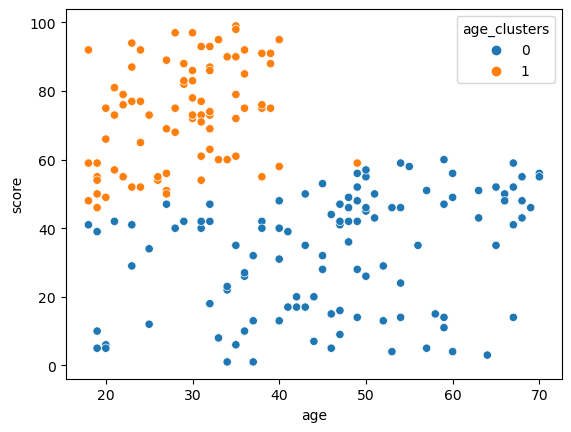

In [28]:
seaborn.scatterplot(x = 'age', y='score', hue='age_clusters', data=df)

In [29]:
from sklearn.cluster import KMeans

In [30]:
K_range = range(1,12)
wCSS = []

In [31]:
for k in K_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['income', 'score']])
    wCSS.append(km.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
wCSS

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30241.343617936593,
 24986.52564064288,
 21838.863692828912,
 19636.75396489815,
 17511.7418692661]

In [35]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(K_range, wCSS)

NameError: name 'plt' is not defined